# Pipelines, grid search i text mining

### Nivell 1
#### Exercici 1
Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.

In [137]:
import pandas as pd
import numpy as np 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as Pipmlear
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\adria\AppData\Roaming\nltk_data...


In [14]:
test = pd.read_csv('tested.csv')
train = pd.read_csv('train.csv')

In [15]:
df = pd.concat([train,test],axis=0)

**Explore the  dataset**

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [18]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

***Imputation of missing values***

In [19]:
df['Embarked'].fillna('S',inplace=True)

In [20]:
df['Fare'].fillna(df.Fare.mean(),inplace=True)

In [21]:
df['Age'].fillna(df.Age.mean(),inplace=True)

In [22]:
df.drop('Cabin',axis=1,inplace=True)

**Featuring Engineering**

In [23]:
gender = {'female':1,'male':0}
gender

{'female': 1, 'male': 0}

In [24]:
df['Sex']=df['Sex'].map(gender)


In [25]:
df['Sex'].value_counts()

0    843
1    466
Name: Sex, dtype: int64

In [26]:
le = LabelEncoder()
df['Embarked']= le.fit_transform(df['Embarked'])

In [27]:
df['Embarked'].value_counts()

2    916
0    270
1    123
Name: Embarked, dtype: int64

In [28]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [29]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,2
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,2


<AxesSubplot:xlabel='Survived', ylabel='Count'>

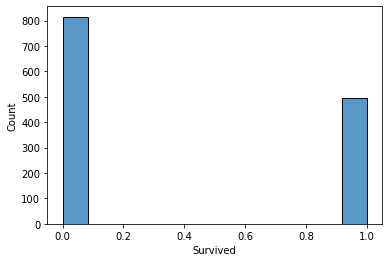

In [30]:
sns.histplot(df['Survived'])

 throught the independent variable  we can see that the dataset is unbalanced



In [31]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

next step is construct a pipeline to group 3 process 
- threat the unbalanced data
- standarize the data
- implement  RandomForestClassification

In [90]:
over = SMOTE()
under = RandomUnderSampler()

In [91]:
pipe = Pipmlear([('o', over),('under', under),('scaler',StandardScaler()),('Random_Forest',RF())])
param_grid = { 
    'Random_Forest__n_estimators': [200, 500],
    'Random_Forest__max_features': ['auto', 'sqrt', 'log2'],
    'Random_Forest__max_depth' : [4,5,6,7,8],
    'Random_Forest__criterion' :['gini', 'entropy']
}
                

In [92]:
sorted(pipe.get_params().keys())

['Random_Forest',
 'Random_Forest__bootstrap',
 'Random_Forest__ccp_alpha',
 'Random_Forest__class_weight',
 'Random_Forest__criterion',
 'Random_Forest__max_depth',
 'Random_Forest__max_features',
 'Random_Forest__max_leaf_nodes',
 'Random_Forest__max_samples',
 'Random_Forest__min_impurity_decrease',
 'Random_Forest__min_impurity_split',
 'Random_Forest__min_samples_leaf',
 'Random_Forest__min_samples_split',
 'Random_Forest__min_weight_fraction_leaf',
 'Random_Forest__n_estimators',
 'Random_Forest__n_jobs',
 'Random_Forest__oob_score',
 'Random_Forest__random_state',
 'Random_Forest__verbose',
 'Random_Forest__warm_start',
 'memory',
 'o',
 'o__k_neighbors',
 'o__n_jobs',
 'o__random_state',
 'o__sampling_strategy',
 'scaler',
 'scaler__copy',
 'scaler__with_mean',
 'scaler__with_std',
 'steps',
 'under',
 'under__random_state',
 'under__replacement',
 'under__sampling_strategy',
 'verbose']

In [93]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('o', SMOTE()), ('under', RandomUnderSampler()),
                ('scaler', StandardScaler()),
                ('Random_Forest', RandomForestClassifier())])

after the fitting and before implement  GridSearch we can observe the metrics  of the pipeline implementation


In [98]:
pipe.score(X_test, y_test)

0.8931297709923665

In [99]:
y_pipe_predict = pipe.predict(X_test)

In [100]:
accuracy_score(y_test, y_pipe_predict)

0.8931297709923665

In [101]:
confusion_matrix(y_test,y_pipe_predict)

array([[150,  13],
       [ 15,  84]], dtype=int64)

now  in order to find the best estimators of the model i will use GridSearchCV

In [102]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)


In [103]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('o', SMOTE()),
                                       ('under', RandomUnderSampler()),
                                       ('scaler', StandardScaler()),
                                       ('Random_Forest',
                                        RandomForestClassifier())]),
             param_grid={'Random_Forest__criterion': ['gini', 'entropy'],
                         'Random_Forest__max_depth': [4, 5, 6, 7, 8],
                         'Random_Forest__max_features': ['auto', 'sqrt',
                                                         'log2'],
                         'Random_Forest__n_estimators': [200, 500]})

In [104]:
grid.best_params_

{'Random_Forest__criterion': 'entropy',
 'Random_Forest__max_depth': 7,
 'Random_Forest__max_features': 'sqrt',
 'Random_Forest__n_estimators': 500}

In [105]:
best_grid = grid.best_estimator_
best_grid.fit(X_train,y_train)

predict_train = best_grid.predict(X_train)
predict_test = best_grid.predict(X_test)


print('accuracy on train data: ',accuracy_score(y_train, predict_train))
print('accuracy on test data: ', accuracy_score(y_test, predict_test))

accuracy on train data:  0.9130850047755492
accuracy on test data:  0.8740458015267175


In [106]:
confusion_matrix(y_test,predict_test)

array([[148,  15],
       [ 18,  81]], dtype=int64)

## Exercici 2
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules

In [111]:
f = open('fragment_isla.txt','r')

In [112]:
content = f.read()

In [113]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
tokenized_word=tokenizer.tokenize(content)

In [114]:
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 262 samples and 468 outcomes>


In [115]:
fdist.most_common(5)

[('the', 28), ('was', 16), ('and', 15), ('he', 11), ('Attention', 10)]

## Nivell 2
### Exercici 1
Treu les stopwords i realitza stemming al teu conjunt de dades.

In [116]:

stop_words=set(stopwords.words("english"))
print(stop_words)

{'aren', 'from', 'there', 'very', 'wasn', 'd', 'before', 'here', 'this', 'most', 'her', 'mightn', "you've", 'do', 'few', 'am', 'its', 'been', 'how', 'each', 'some', 'because', 'where', 'so', 'once', "shouldn't", 'all', 'their', "weren't", "needn't", 'below', 'had', 'is', 'm', 'now', 'ma', 'own', 'has', 'during', 'between', 'wouldn', 'hers', 'down', "isn't", "aren't", 'above', 'an', 'any', 'to', 'hadn', 'or', 've', 'in', 'when', 'up', 'weren', 'about', 'under', 're', 'with', 'hasn', "doesn't", 'again', "wouldn't", 'can', 'those', 'was', 'if', 'than', 'himself', 'which', 'didn', 'itself', "don't", "wasn't", 'who', 'won', 'needn', "you'd", 'll', "won't", 'o', "you'll", 'his', 'we', "she's", 'of', 'don', 'against', 'by', "mustn't", 'ours', 'he', 'yours', 'being', 'me', 'having', 'that', 'after', "should've", 'y', 'isn', 'too', 't', 'are', 'until', 'out', 'ain', "mightn't", 'shouldn', 'what', 'does', 'into', 'did', "it's", "hasn't", 'just', 'i', 'why', 'you', 'only', 'haven', 'doesn', 'your

In [117]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)

print("Filterd Sentence:",filtered_sent)

Filterd Sentence: ['Attention', 'voice', 'began', 'call', 'though', 'oboe', 'suddenly', 'become', 'articulate', 'Attention', 'repeated', 'high', 'nasal', 'monotone', 'Attention', 'Lying', 'like', 'corpse', 'dead', 'leaves', 'hair', 'matted', 'face', 'grotesquely', 'smudged', 'bruised', 'clothes', 'rags', 'muddy', 'Will', 'Farnaby', 'awoke', 'start', 'Molly', 'called', 'Time', 'get', 'Time', 'get', 'dressed', 'Mustn', 'late', 'office', 'Thank', 'darling', 'said', 'sat', 'A', 'sharp', 'pain', 'stabbed', 'right', 'knee', 'kinds', 'pain', 'back', 'arms', 'forehead', 'Attention', 'voice', 'insisted', 'without', 'slightest', 'change', 'tone', 'Leaning', 'one', 'elbow', 'Will', 'looked', 'saw', 'bewilderment', 'grey', 'wallpaper', 'yellow', 'curtains', 'London', 'bedroom', 'glade', 'among', 'trees', 'long', 'shadows', 'slanting', 'lights', 'early', 'morning', 'forest', 'Attention', 'Why', 'say', 'Attention', 'Attention', 'Attention', 'voice', 'insisted', 'strangely', 'senselessly', 'Molly', '

In [118]:
ps = PorterStemmer()
stemmed_text =[]
for w in filtered_sent:
    stemmed_text.append(ps.stem(w))
print(stemmed_text)

['attent', 'voic', 'began', 'call', 'though', 'obo', 'suddenli', 'becom', 'articul', 'attent', 'repeat', 'high', 'nasal', 'monoton', 'attent', 'ly', 'like', 'corps', 'dead', 'leav', 'hair', 'mat', 'face', 'grotesqu', 'smudg', 'bruis', 'cloth', 'rag', 'muddi', 'will', 'farnabi', 'awok', 'start', 'molli', 'call', 'time', 'get', 'time', 'get', 'dress', 'mustn', 'late', 'offic', 'thank', 'darl', 'said', 'sat', 'A', 'sharp', 'pain', 'stab', 'right', 'knee', 'kind', 'pain', 'back', 'arm', 'forehead', 'attent', 'voic', 'insist', 'without', 'slightest', 'chang', 'tone', 'lean', 'one', 'elbow', 'will', 'look', 'saw', 'bewilder', 'grey', 'wallpap', 'yellow', 'curtain', 'london', 'bedroom', 'glade', 'among', 'tree', 'long', 'shadow', 'slant', 'light', 'earli', 'morn', 'forest', 'attent', 'whi', 'say', 'attent', 'attent', 'attent', 'voic', 'insist', 'strang', 'senselessli', 'molli', 'question', 'molli', 'the', 'name', 'seem', 'open', 'window', 'insid', 'head', 'suddenli', 'horribl', 'familiar', 's

## Nivell 3
### Exercici 1
Realitza sentiment analysis al teu conjunt de dades.

In [133]:
word_string =' '.join(filtered_sent)

In [135]:
## using TextBlob
book_sent = TextBlob(word_string)
book_sent.sentiment

Sentiment(polarity=-0.04173745173745175, subjectivity=0.3666409266409266)

In [139]:
### using SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(word_string)


{'neg': 0.16, 'neu': 0.724, 'pos': 0.116, 'compound': -0.9396}

Due to the fact that the choosen text is just a fragment of the first chapter of the island ( Aldous Huxley )
there's no explicit  sentimental  content therefore, the metrics are that  neutral

***WordCloud***

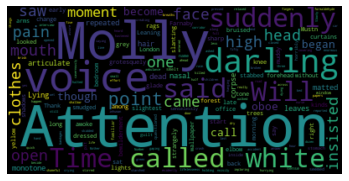

In [132]:

wordcloud = WordCloud().generate(word_string)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()